In [45]:
import matplotlib.pyplot as plt
import pickle as pk
import json
import os
from pprint import pprint
from statistics import mean, stdev
from random import sample

In [46]:
'''Read Scenario data'''
with open('../scenarios.json', 'r') as fp:
    scenarios_info = json.load(fp)
print(scenarios_info.keys())

dict_keys(['test', 'test_2', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'])


In [47]:
base_folder_path = "./simulation-data/SimpleAgg"
base_folders = os.listdir(base_folder_path)
print(base_folders)

['Full_Oracle_ActiveLR_NoResample_Iterations_30_Scenario_3', 'Uninformed_Random_NoResample_Iterations_30_Scenario_1', 'Oracle_ActiveLR_Resample_Iterations_30_Scenario_10', 'Full_Oracle_Random_NoResample_Iterations_30_Scenario_test', 'Oracle_Random_NoResample_Iterations_30_Scenario_10', 'Oracle_ActiveLR_NoResample_Iterations_30_Scenario_2', 'Full_Oracle_Random_NoResample_Iterations_30_Scenario_3', 'Oracle_Random_NoResample_Iterations_30_Scenario_1', 'Full_Oracle_ActiveLR_NoResample_Iterations_30_Scenario_test_2', 'Oracle_ActiveLR_NoResample_Iterations_30_Scenario_3', 'Full_Oracle_ActiveLR_NoResample_Iterations_30_Scenario_test', 'Uninformed_ActiveLR_NoResample_Iterations_30_Scenario_3', 'Uninformed_ActiveLR_NoResample_Iterations_30_Scenario_2', 'Uninformed_Random_NoResample_Iterations_30_Scenario_3', 'Oracle_ActiveLR_NoResample_Iterations_30_Scenario_10', 'Uninformed_Random_NoResample_Iterations_30_Scenario_2', 'Oracle_ActiveLR_NoResample_Iterations_30_Scenario_1', 'Full_Oracle_ActiveLR

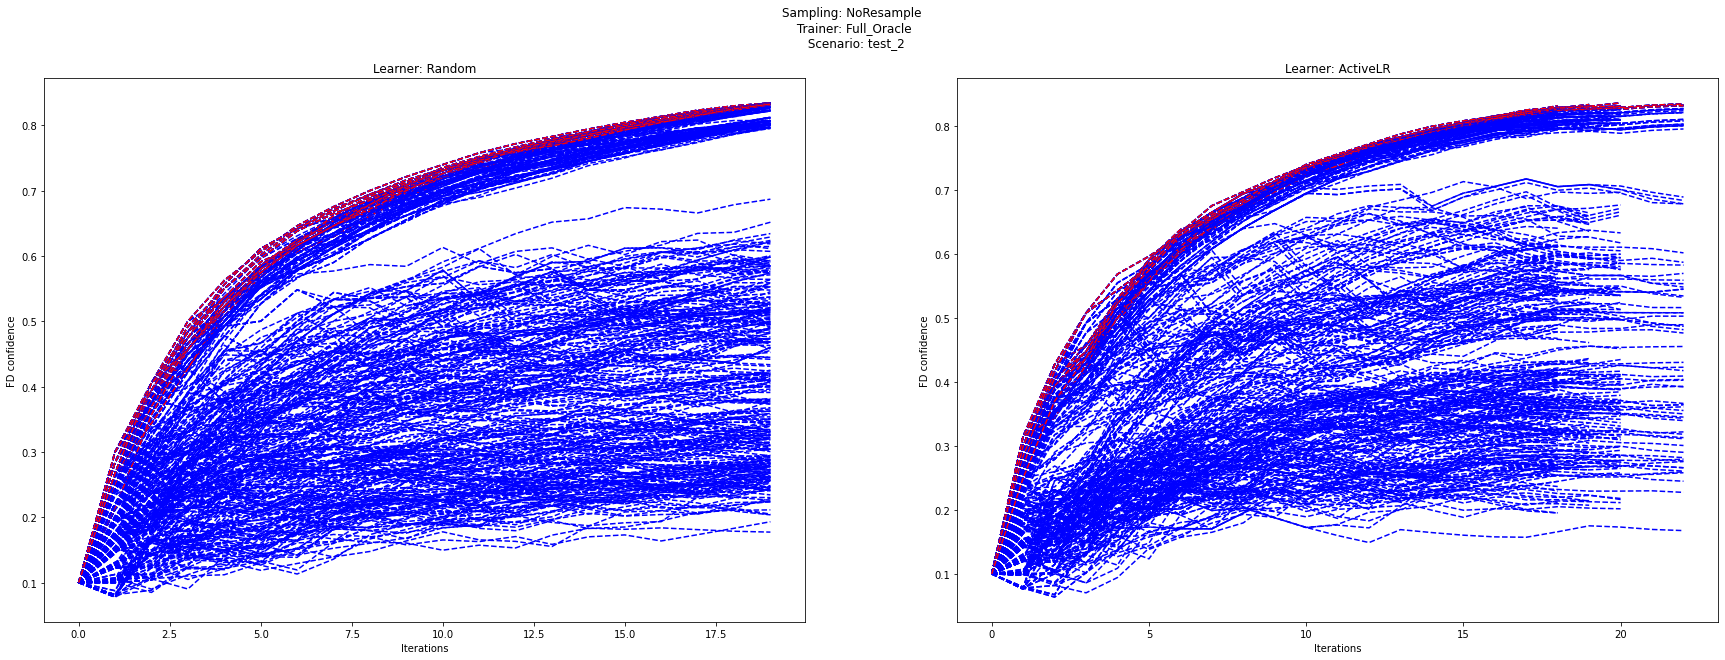

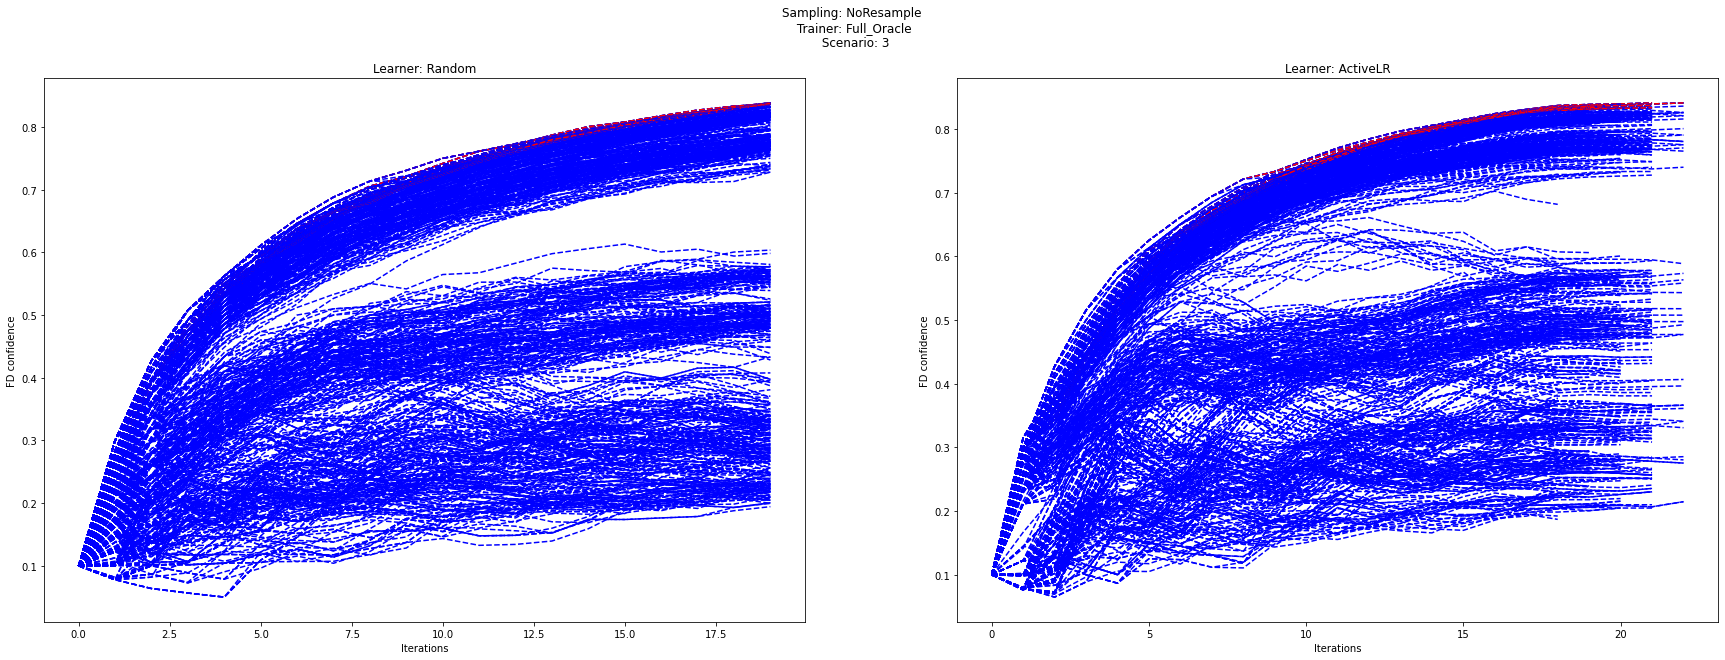

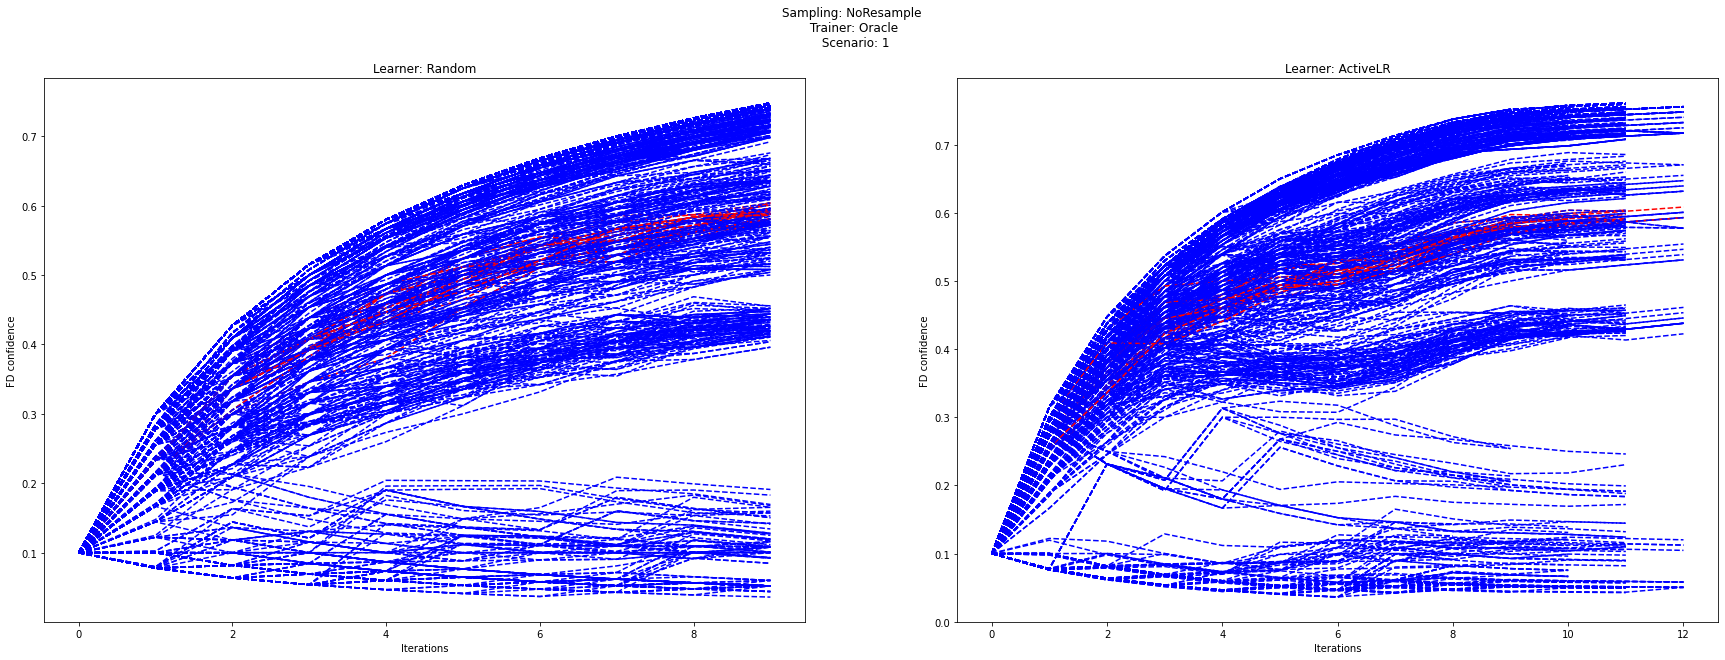

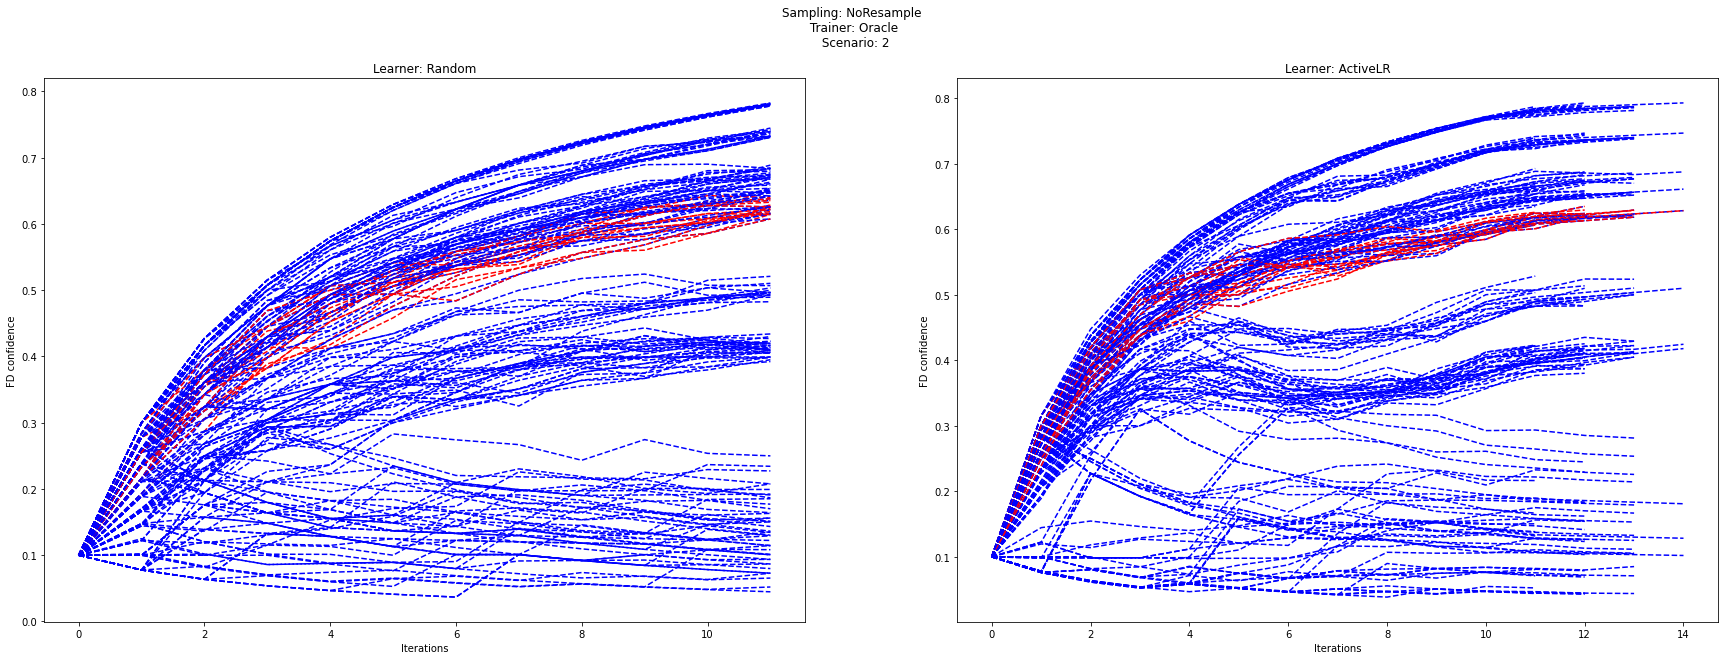

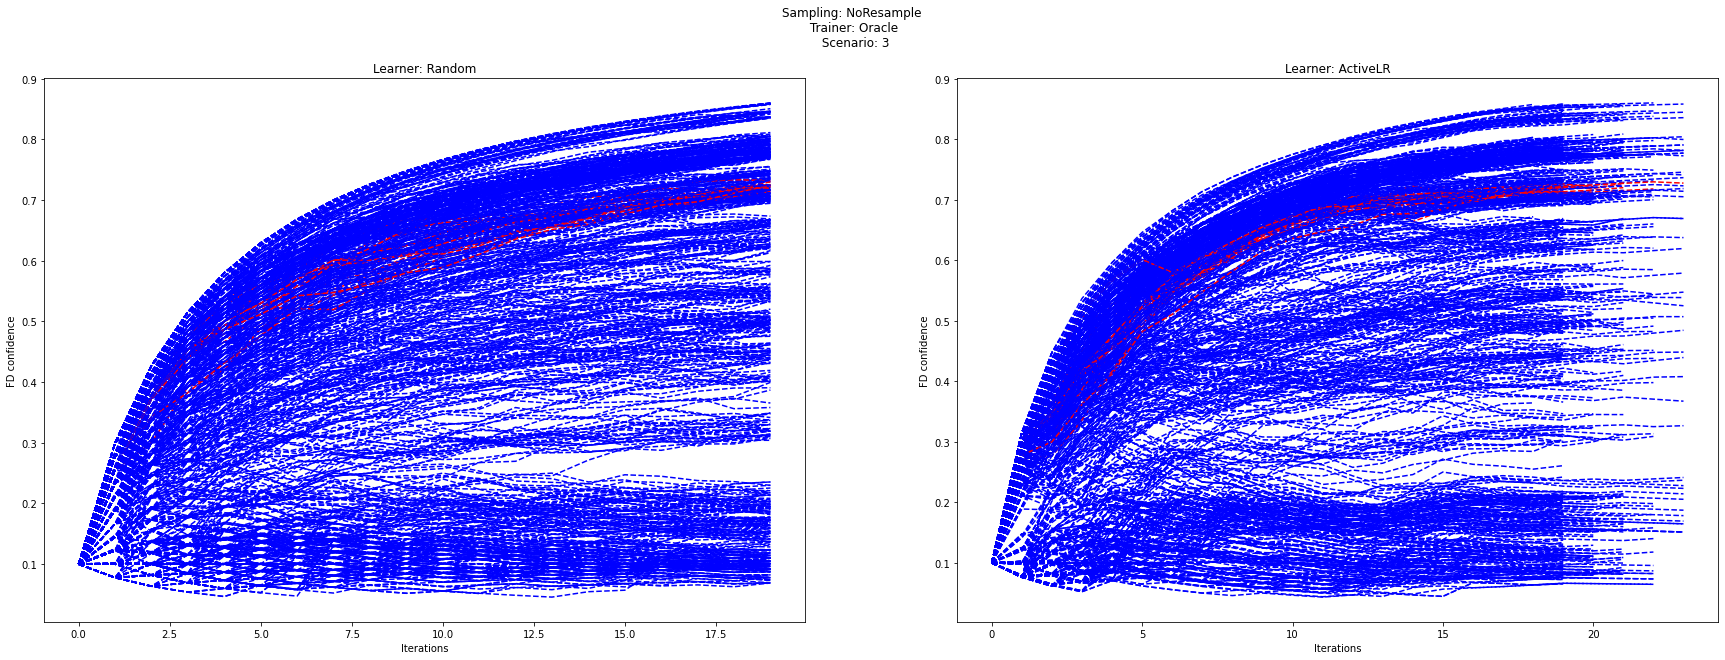

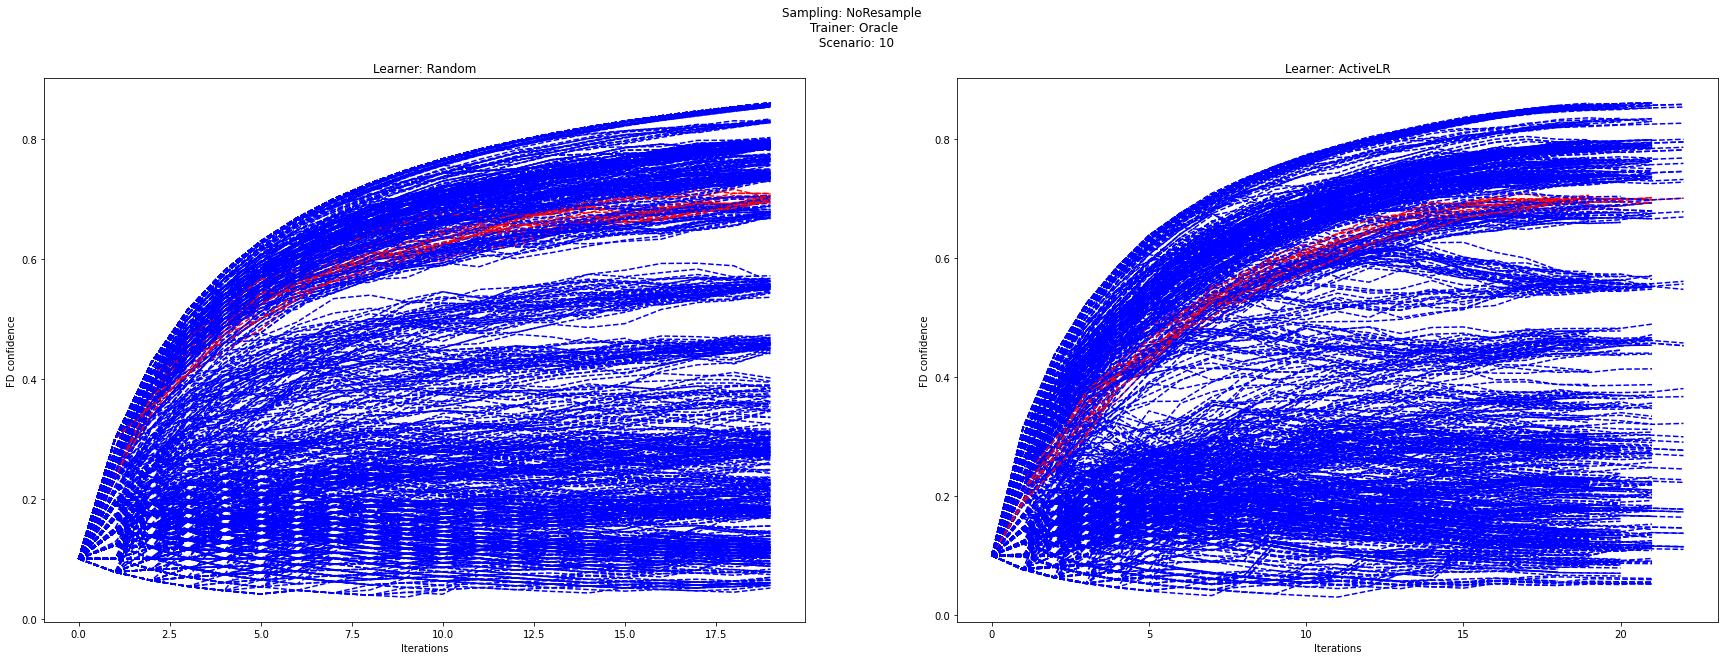

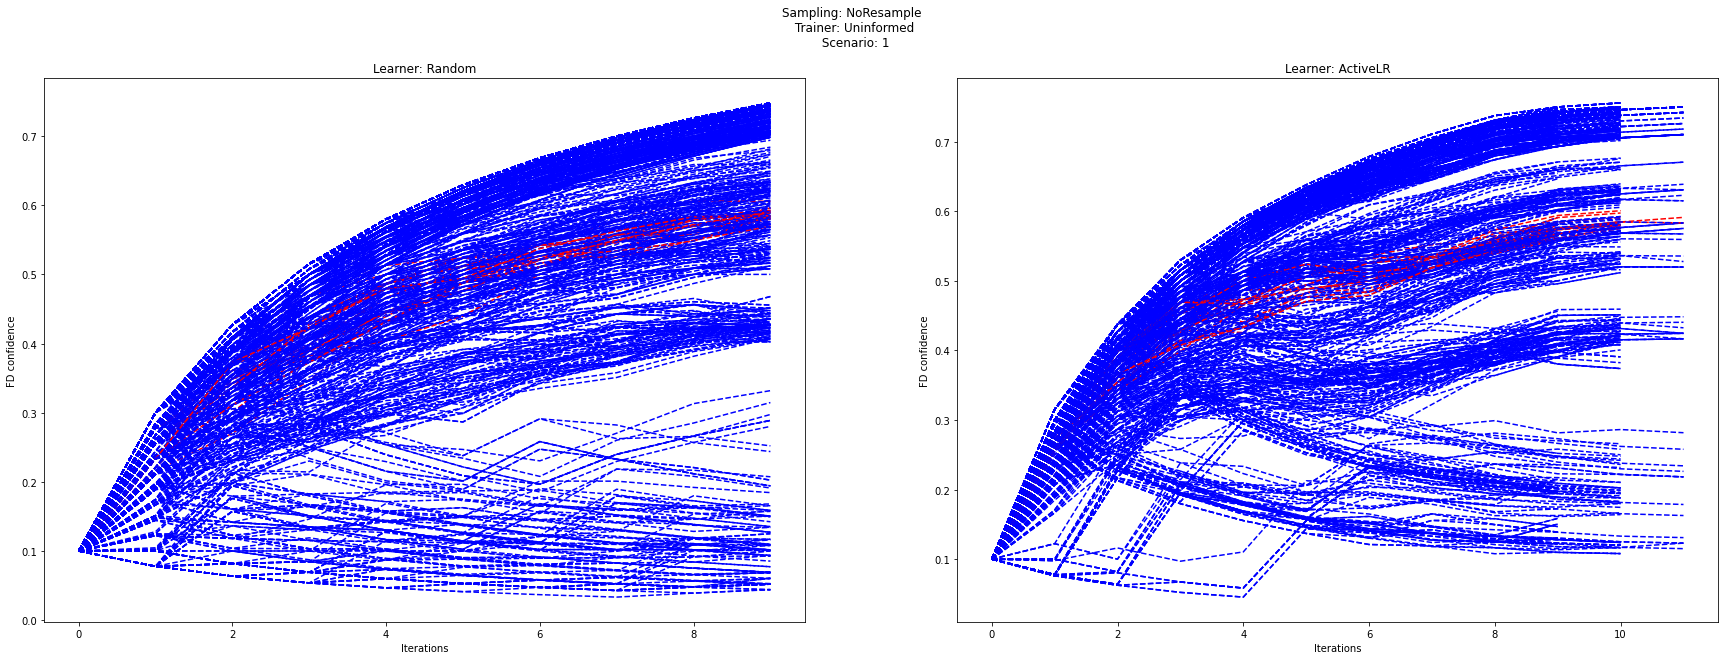

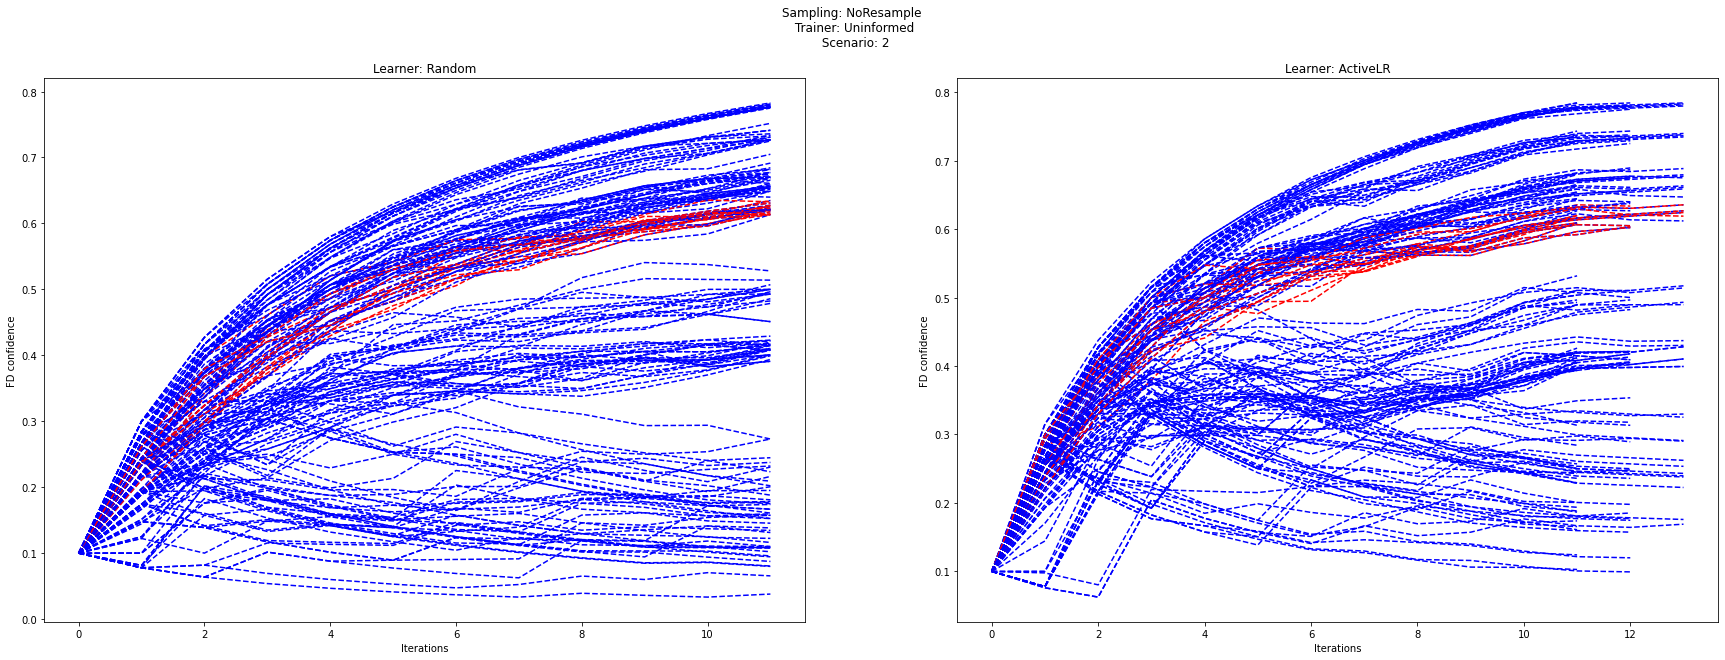

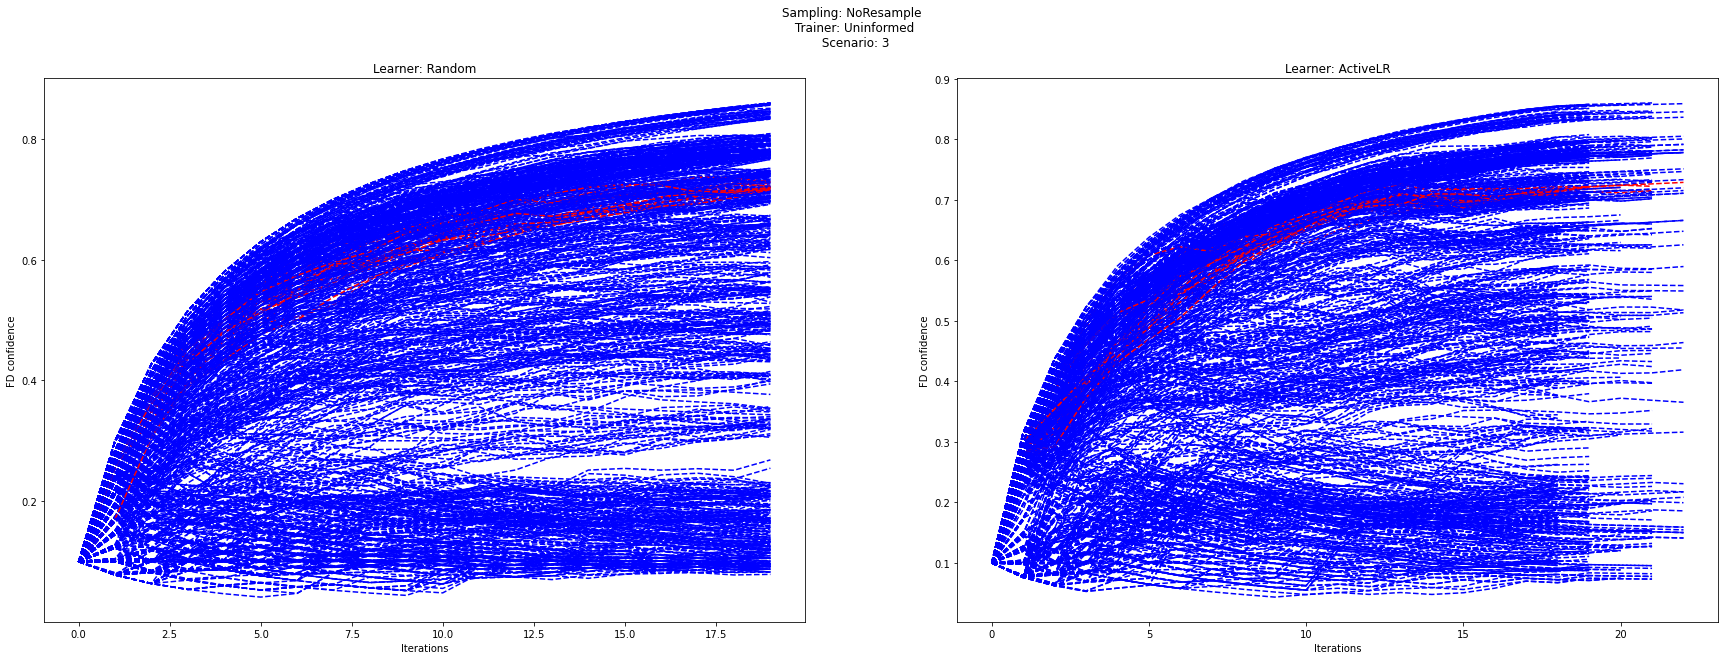

In [48]:
for sampling_type in ["NoResample"]:
    for trainer_type in ["Full_Oracle", "Oracle", "Uninformed"]:
        for scenario in [ "test_2", "1", "2", "3", "10"]:
            figure = plt.figure(figsize=(30,10))
            plt.suptitle(f"Sampling: {sampling_type} \n Trainer: {trainer_type} \n Scenario: {scenario}")
            plot_filled = False
            for learner_type in ["Random", "ActiveLR"]:
                simulation_folder_name = f"{trainer_type}_{learner_type}_{sampling_type}_Iterations_30_Scenario_{scenario}"
                if simulation_folder_name in base_folders:
                    folders = os.listdir(os.path.join(base_folder_path, simulation_folder_name))
                    
                    '''Select the subplot region'''
                    if learner_type == "Random":
                        plt.subplot(1,2,1)
                    else:
                        plt.subplot(1,2,2)
                    
                    for folder in folders:
                        with open(os.path.join(base_folder_path,simulation_folder_name, folder, "project_info.json"), 'r') as fp:
                            project_info = json.load(fp)
                            target_fd = project_info["scenario"]["target_fd"]
                        path = os.path.join(base_folder_path, simulation_folder_name, folder, "fd_metadata.p")

                        if os.path.exists(path):
                            with open(path, 'rb') as fp:
                                data = pk.load(fp)
                            
                            for fd, fd_metadata in data.items():
                                plot_data= [(d.iter_num,d.value) for d in fd_metadata.conf_history]
                                if fd == target_fd:
                                    plt.plot([x for (x,y) in plot_data], [y for (x,y) in plot_data], 'r--')
                                    plot_filled = True
                                else:
                                    plt.plot([x for (x,y) in plot_data], [y for (x,y) in plot_data], 'b--')
                                    plot_filled = True
                            plt.xlabel("Iterations")
                            plt.ylabel('FD confidence')
                            plt.title(f'Learner: {learner_type}')
                    
            else:
                if plot_filled:
                    plt.show()
                else:
                    plt.close()





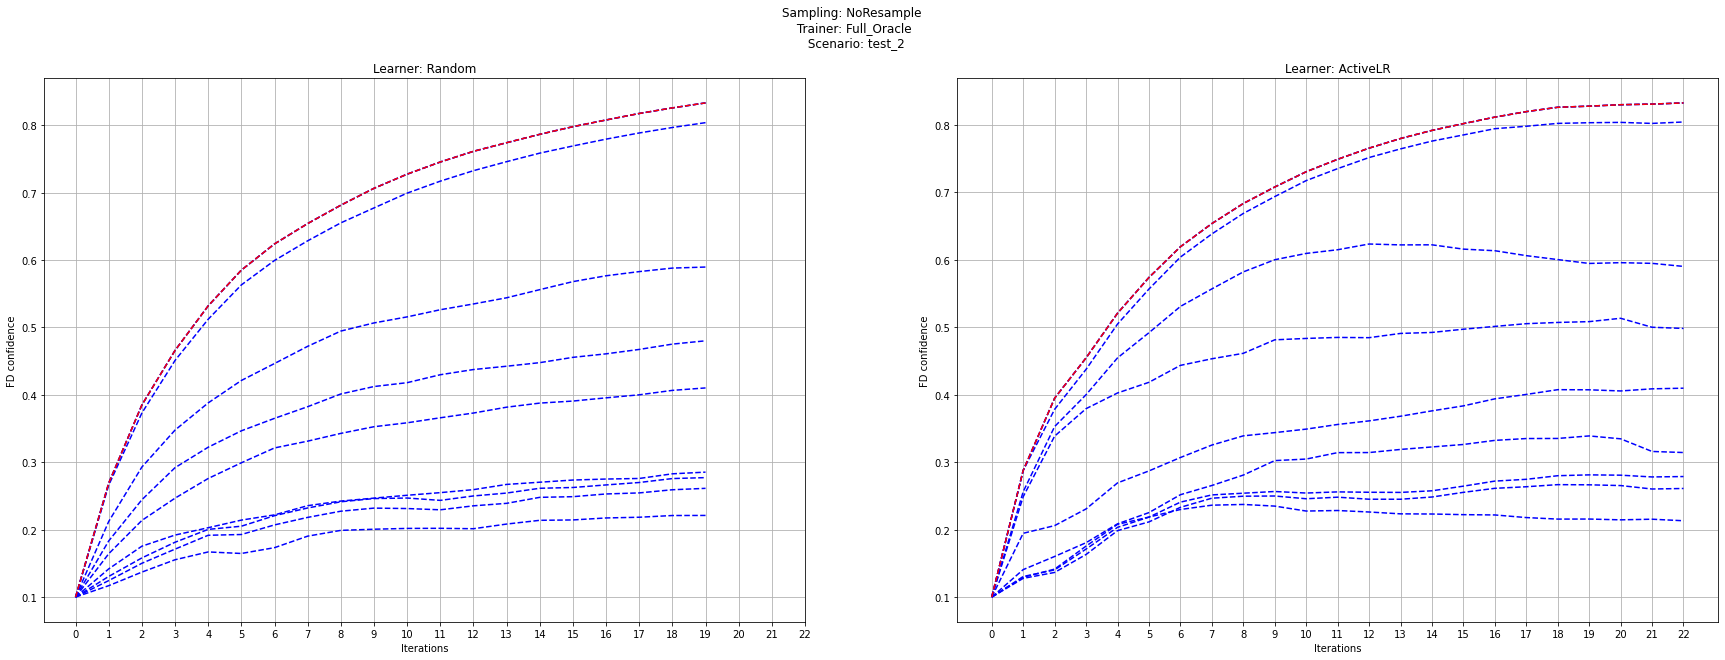

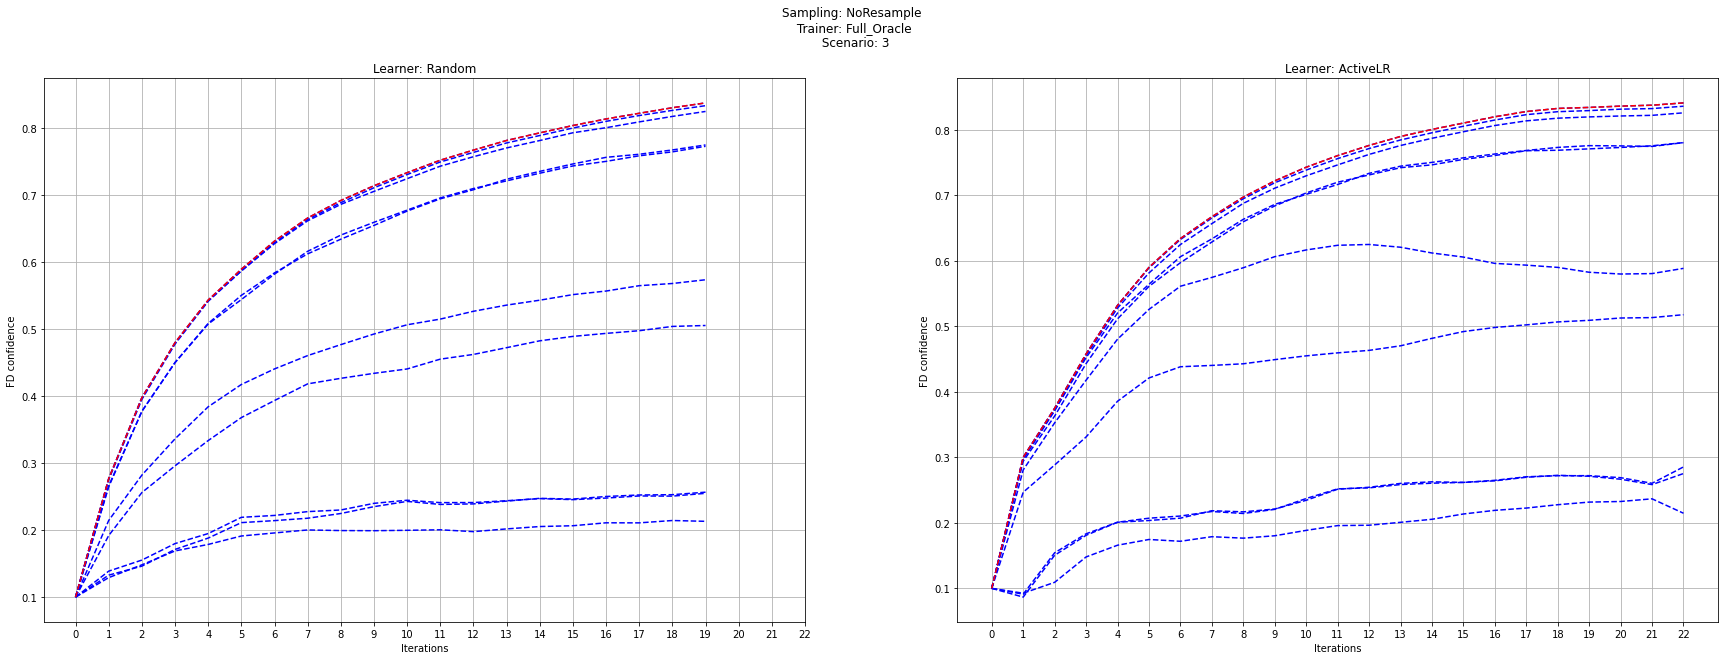

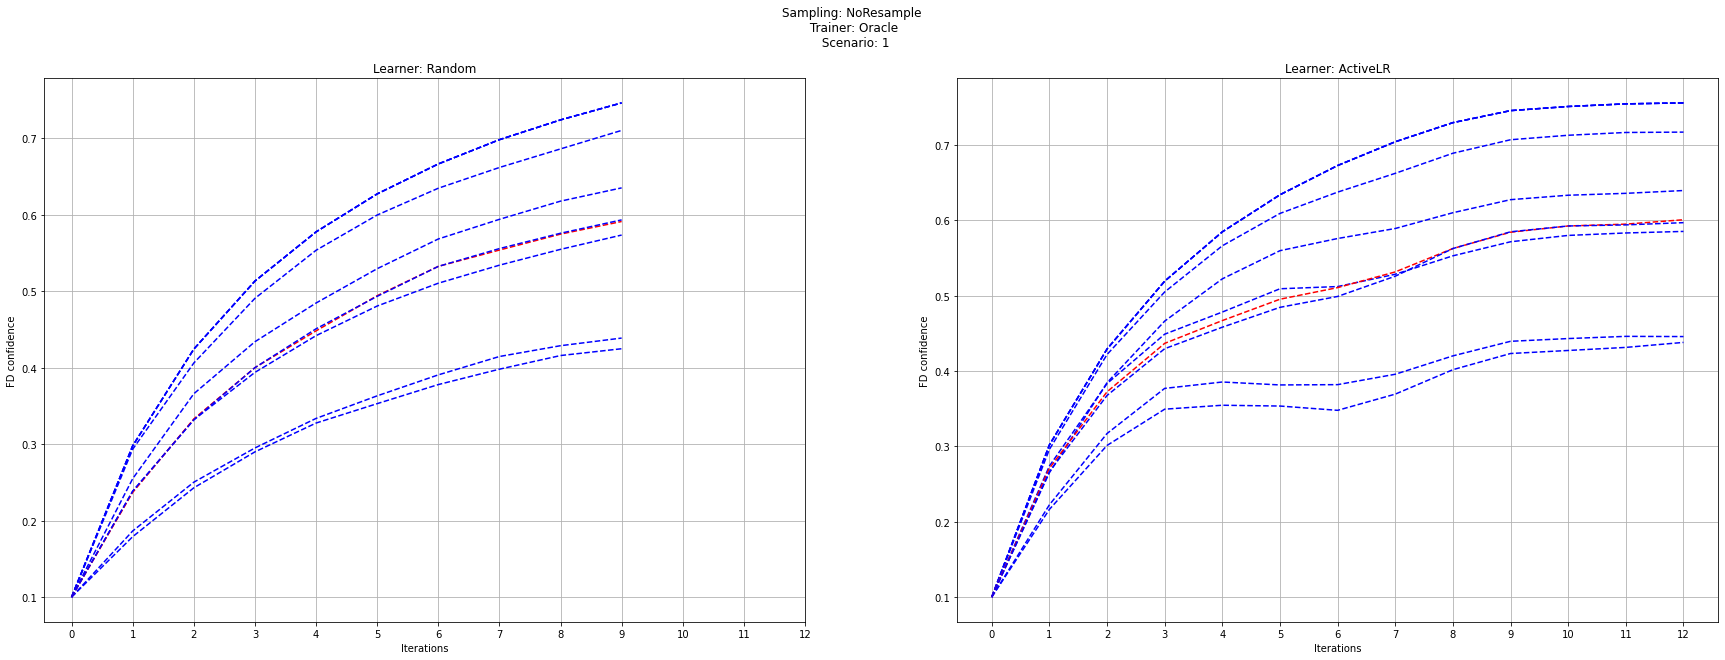

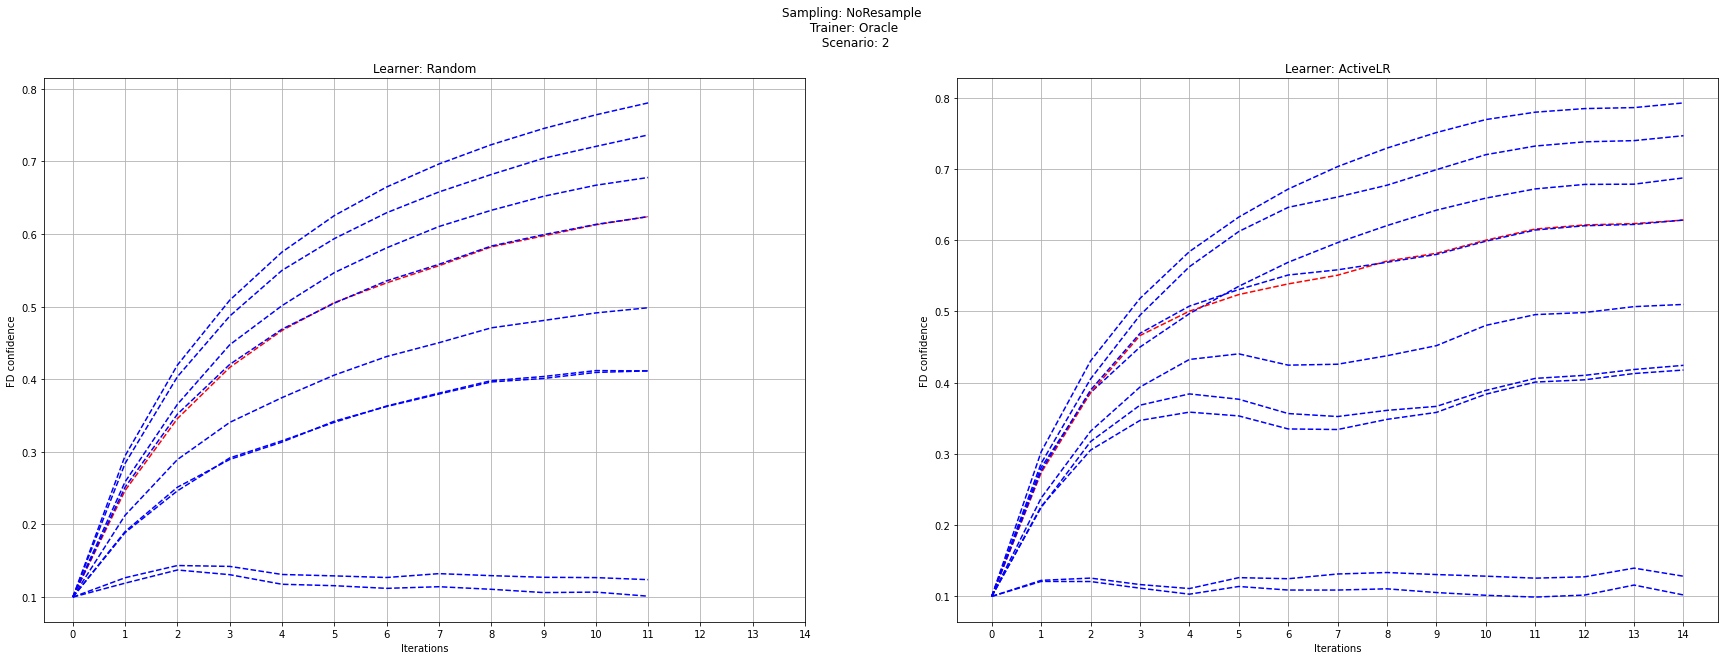

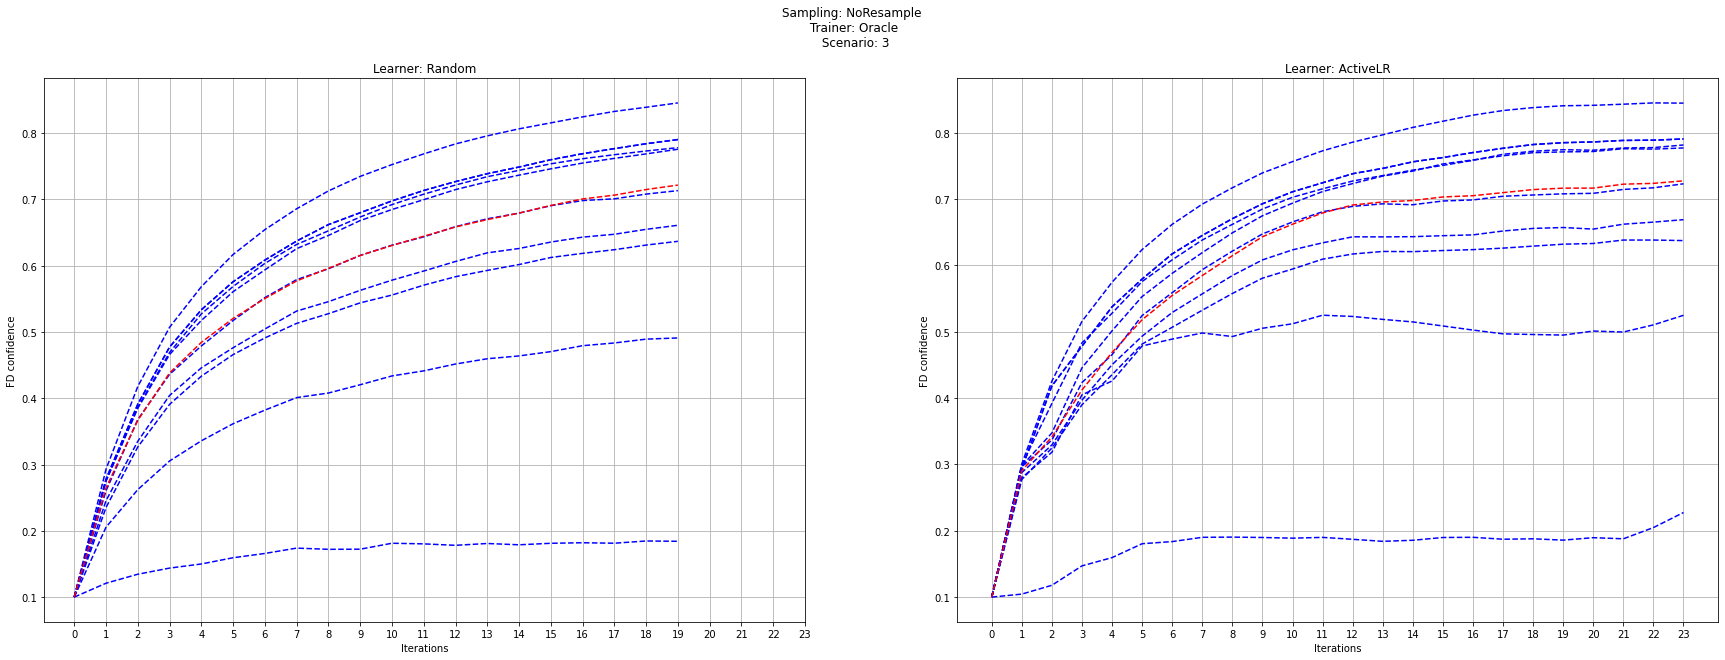

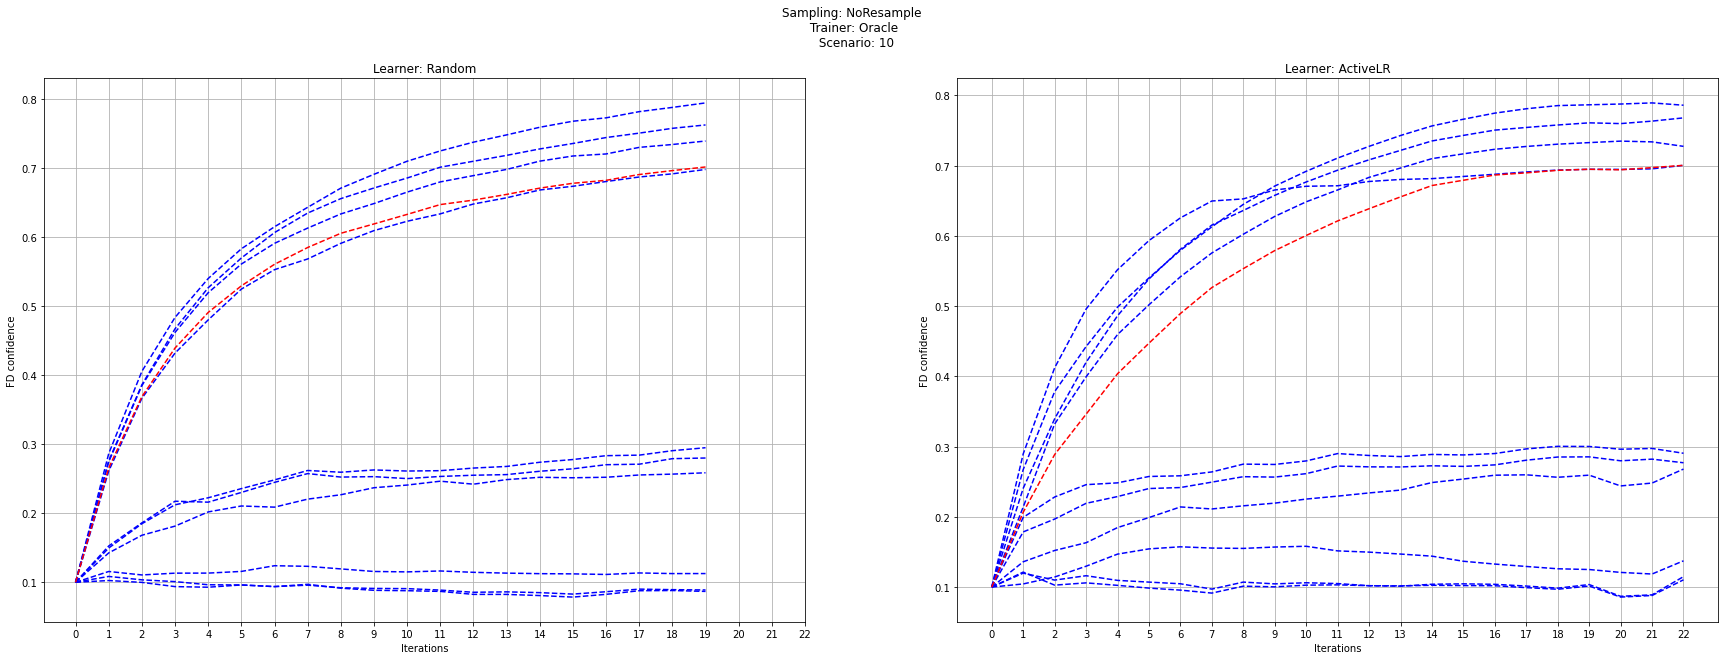

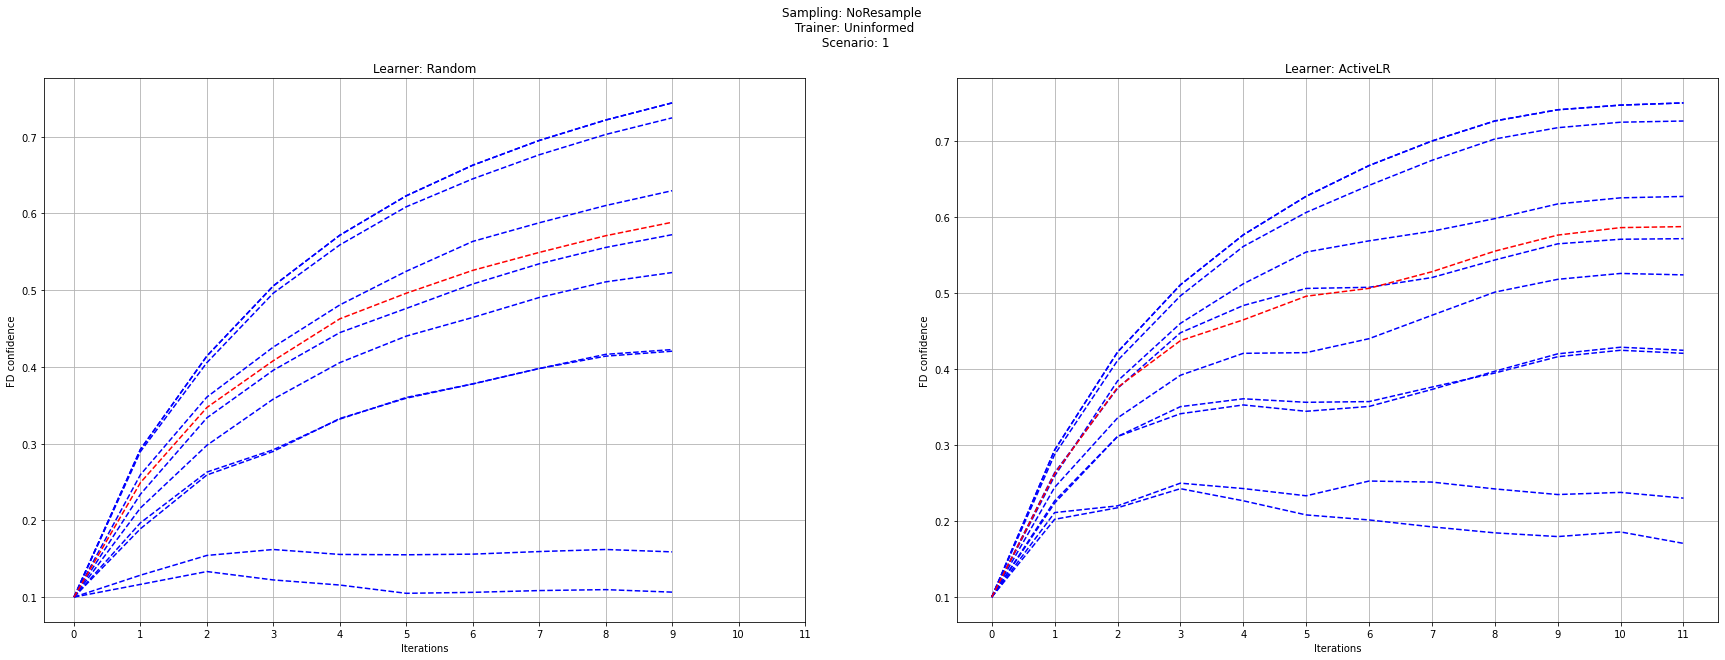

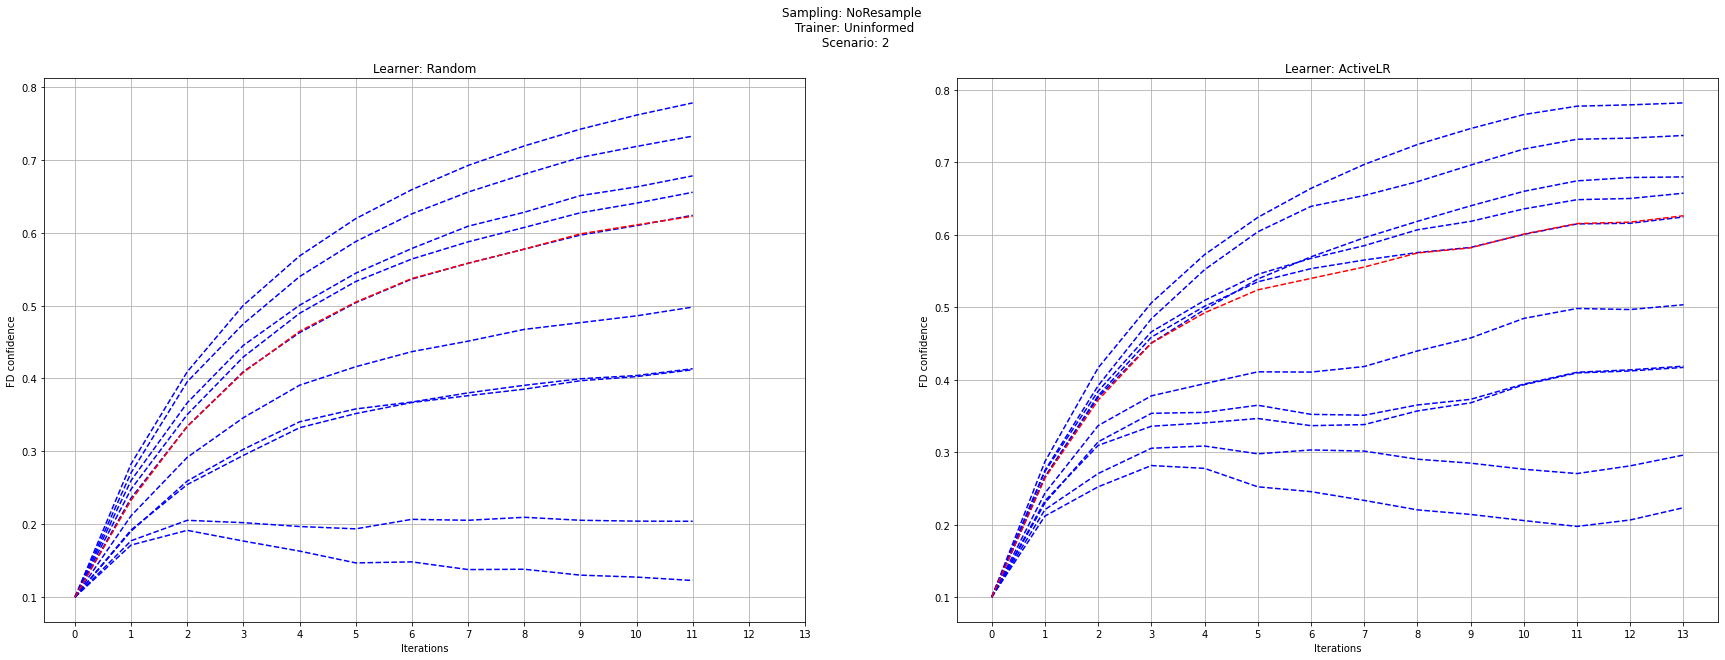

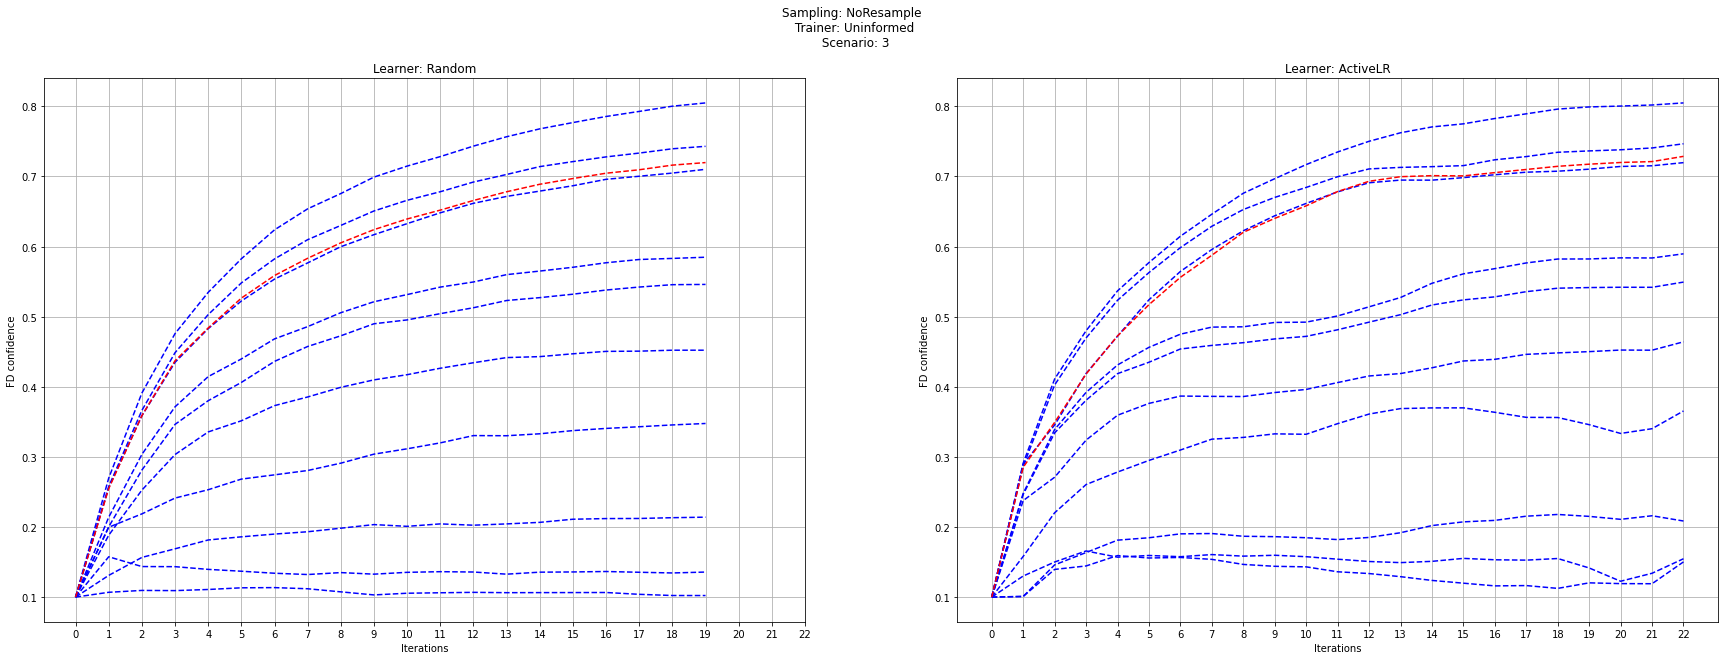

In [49]:
# for sampling_type in ["Resample", "NoResample"]:
for sampling_type in ["NoResample"]:
    for trainer_type in ["Full_Oracle", "Oracle", "Uninformed"]:
        for scenario in ["test_2", "1", "2", "3", "10"]:
            figure = plt.figure(figsize=(30,10))
            plt.suptitle(f"Sampling: {sampling_type} \n Trainer: {trainer_type} \n Scenario: {scenario}")
            max_iter_num = 0

            '''Sample fds except for the target fd for plots'''
            fd_space = [hypothesis['cfd'] for hypothesis in scenarios_info[scenario]['hypothesis_space']]
            sampled_fd_space = sample(fd_space, min(len(fd_space),10))
            target_fd = scenarios_info[scenario]['target_fd']
            if target_fd not in sampled_fd_space:
                sampled_fd_space.append(target_fd)
            
            '''Indication whether the plot is filled or not'''
            plot_filled = False

            for learner_type in ["Random", "ActiveLR"]:
                simulation_folder_name = f"{trainer_type}_{learner_type}_{sampling_type}_Iterations_30_Scenario_{scenario}"
                if simulation_folder_name in base_folders:
                    folders = os.listdir(os.path.join(base_folder_path, simulation_folder_name))
                    
                    '''Select the subplot region'''
                    if learner_type == "Random":
                        plt.subplot(1,2,1)
                    else:
                        plt.subplot(1,2,2)
                    
                    tmp_plot_dict = dict()
                    for folder in folders:
                        with open(os.path.join(base_folder_path,simulation_folder_name, folder, "project_info.json"), 'r') as fp:
                            project_info = json.load(fp)
                            target_fd = project_info["scenario"]["target_fd"]
                        path = os.path.join(base_folder_path, simulation_folder_name, folder, "fd_metadata.p")

                        if os.path.exists(path):
                            with open(path, 'rb') as fp:
                                data = pk.load(fp)
                            
                            for fd, fd_metadata in data.items():

                                if fd not in tmp_plot_dict:
                                    tmp_plot_dict[fd] = dict()
                                
                                for d in fd_metadata.conf_history:
                                    iter_num, value = d.iter_num, d.value

                                    '''Update max iter num among Random and ActiveLR for same x-axis range in plots for comparison'''
                                    if iter_num > max_iter_num:
                                        max_iter_num = iter_num
                                    if iter_num not in tmp_plot_dict[fd]:
                                        tmp_plot_dict[fd][iter_num] = []
                                    tmp_plot_dict[fd][iter_num].append(value)


                    # plot_data= [(d.iter_num,d.value) ]
                    # 
                    '''Compute mean and variance'''
                    plot_value_dict = {}
                    for fd in sampled_fd_space:
                        if fd in tmp_plot_dict:
                            plot_value_dict[fd] = dict()
                            for iter, values in tmp_plot_dict[fd].items():
                                if len(values) == 1:
                                    values.append(values[0])
                                plot_value_dict[fd][iter] = {'mean': mean(values), 'std':stdev(values) }
                        
                            else:
                                iters = sorted(list(plot_value_dict[fd].keys()))
                                if fd == target_fd:
                                    plot_filled = True
                                    plt.plot(iters, [plot_value_dict[fd][iter]['mean'] for iter in iters], 'r--')
                                else:
                                    plot_filled = True
                                    plt.plot(iters, [plot_value_dict[fd][iter]['mean'] for iter in iters], 'b--')
                    
                    
                    plt.xlabel("Iterations")
                    plt.ylabel('FD confidence')
                    plt.title(f'Learner: {learner_type}')
                    plt.grid(True)
                    
            else:
                if plot_filled:
                    plt.subplot(1,2,1)
                    plt.xticks(range(max_iter_num+1))
                    plt.subplot(1,2,2)
                    plt.xticks(range(max_iter_num+1))
                    plt.show()
                else:
                    plt.close()





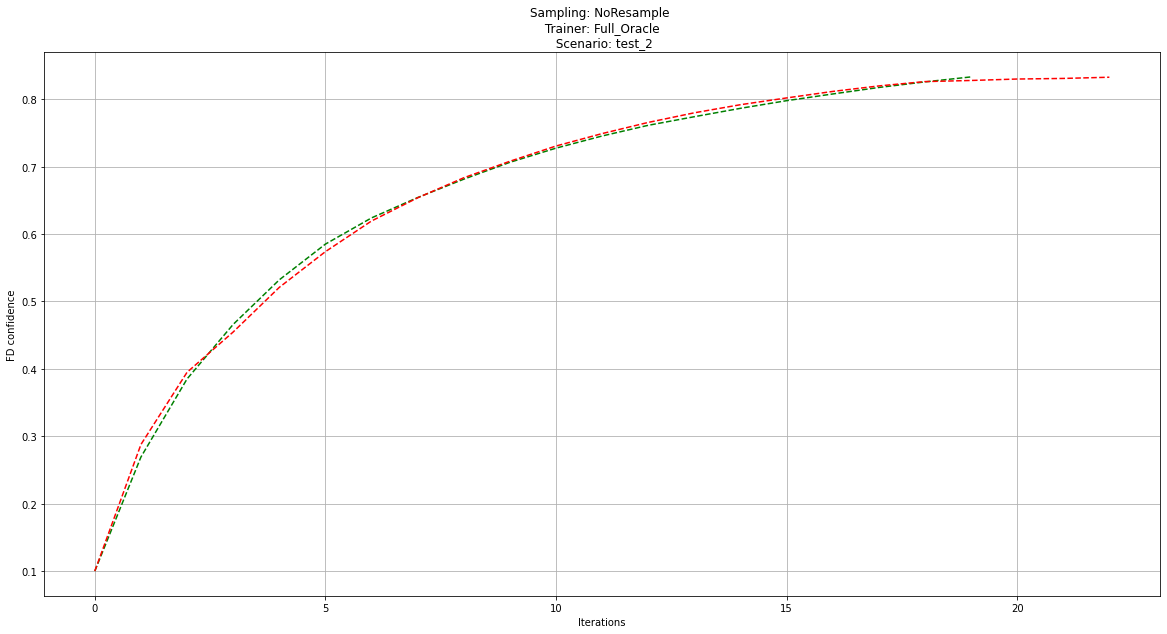

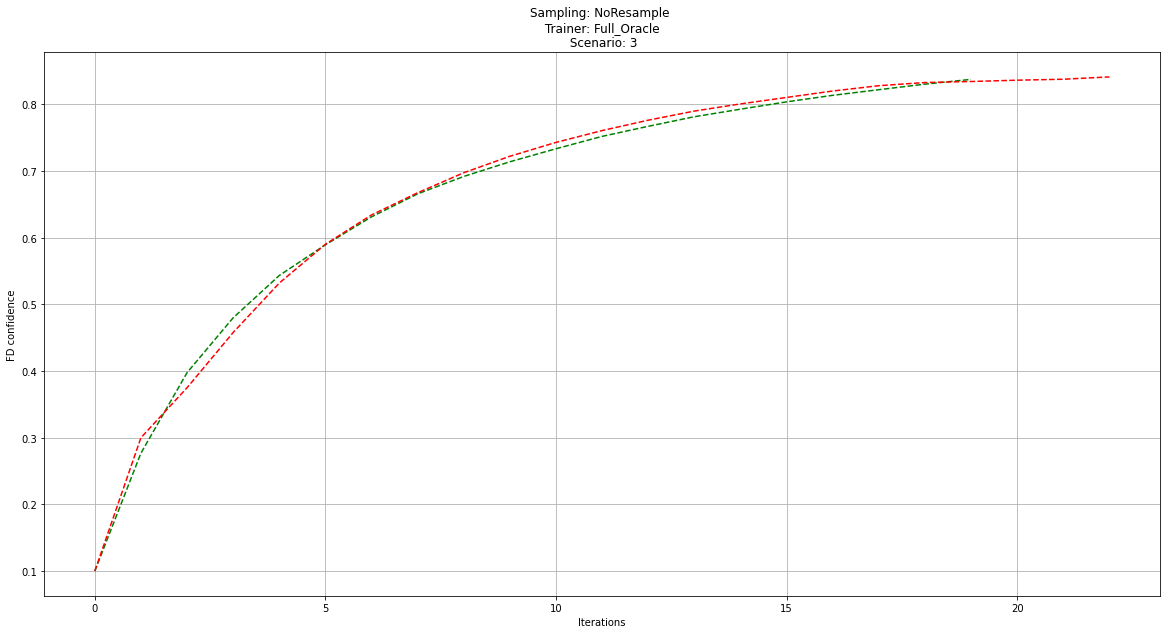

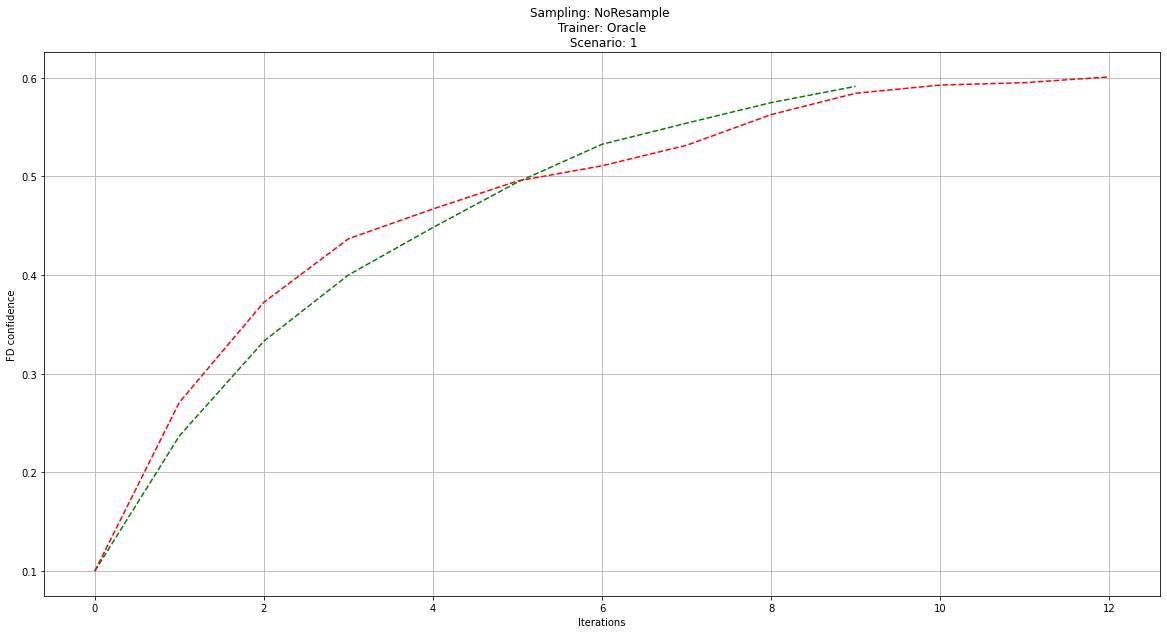

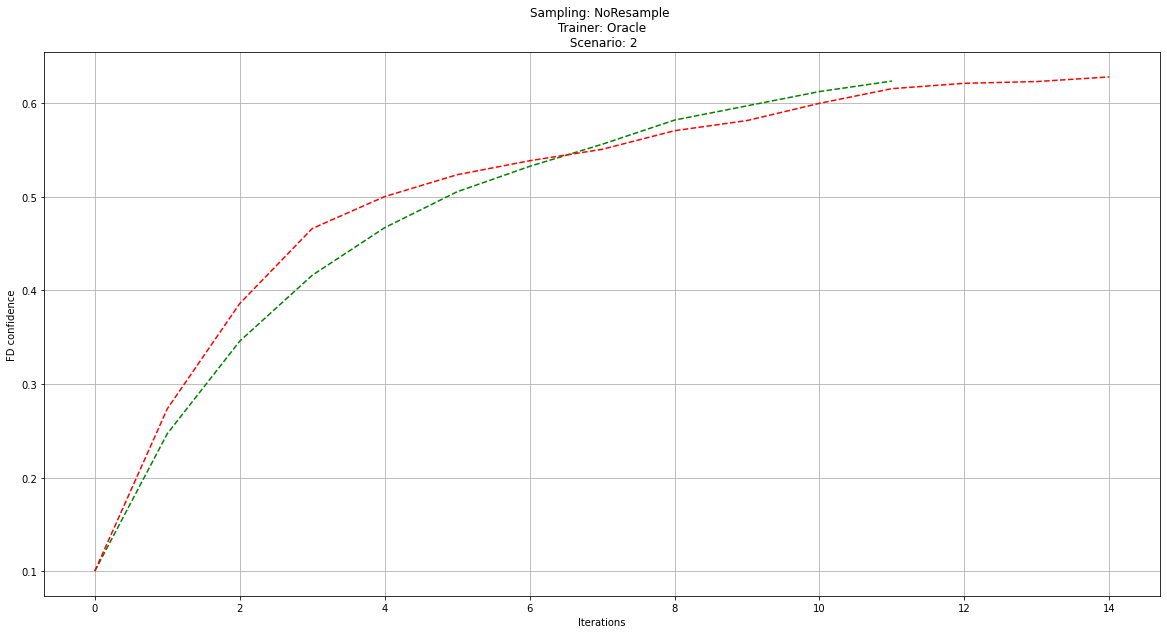

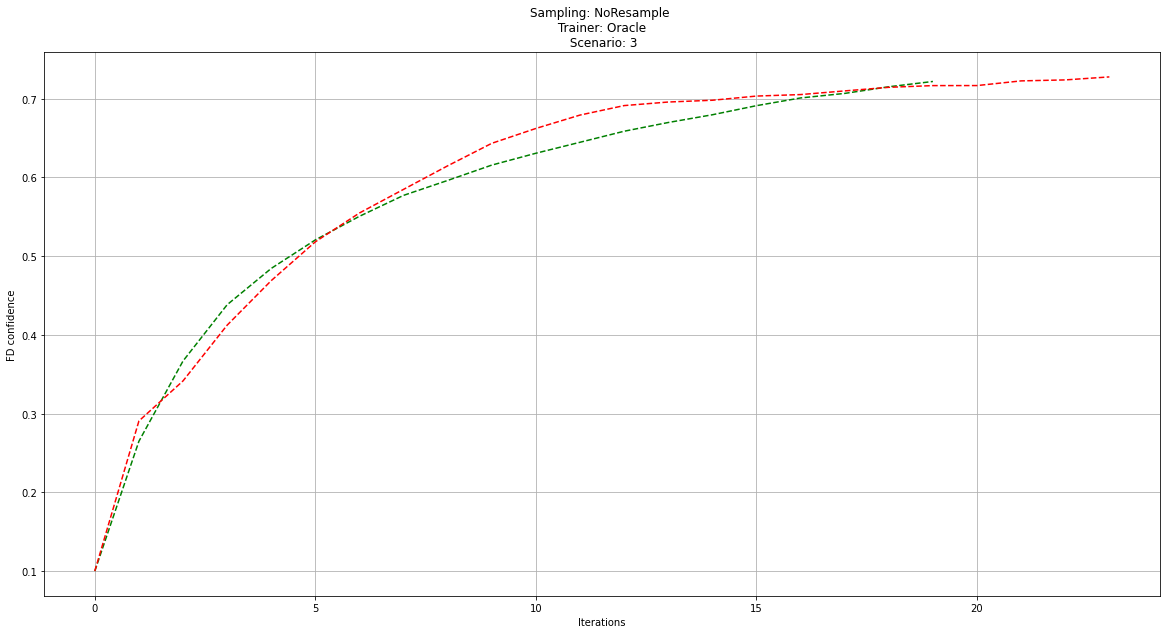

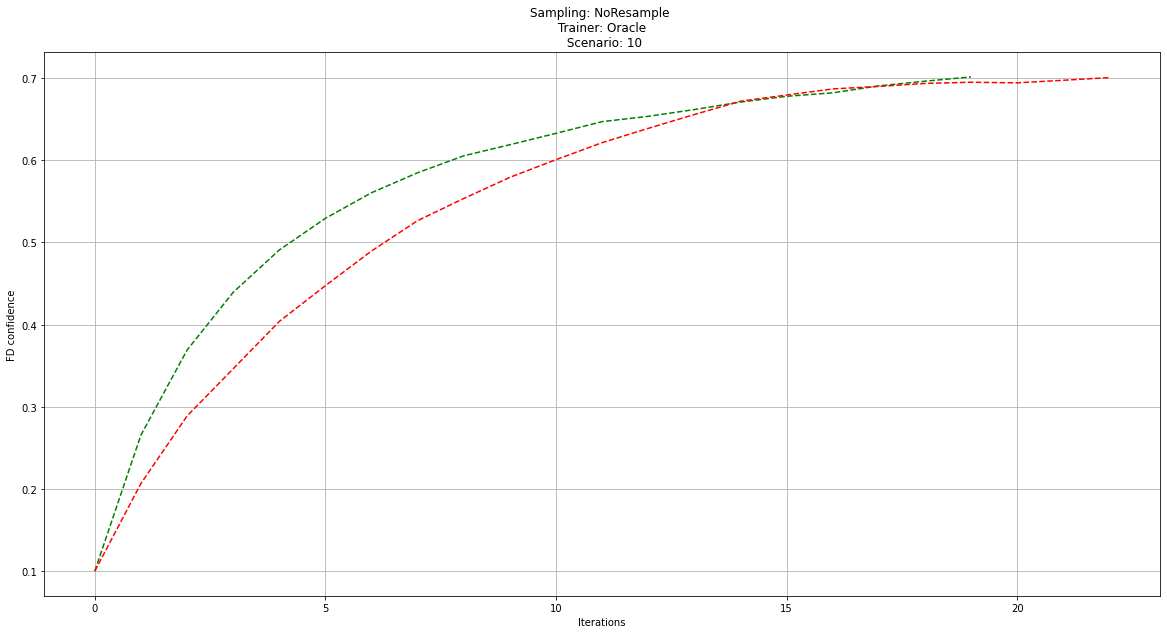

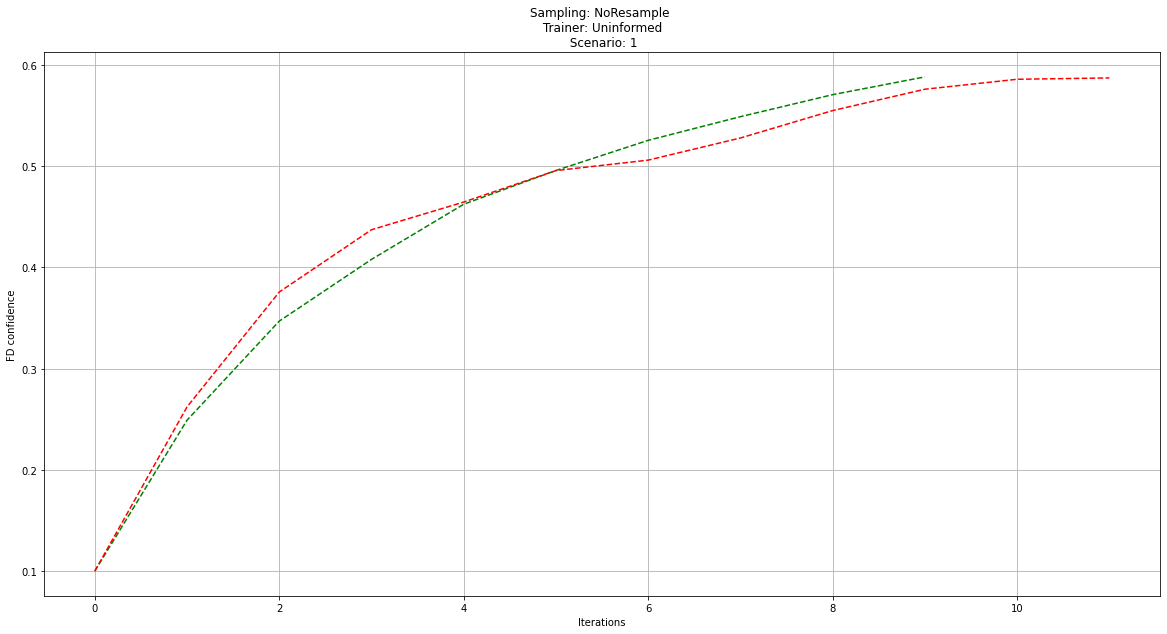

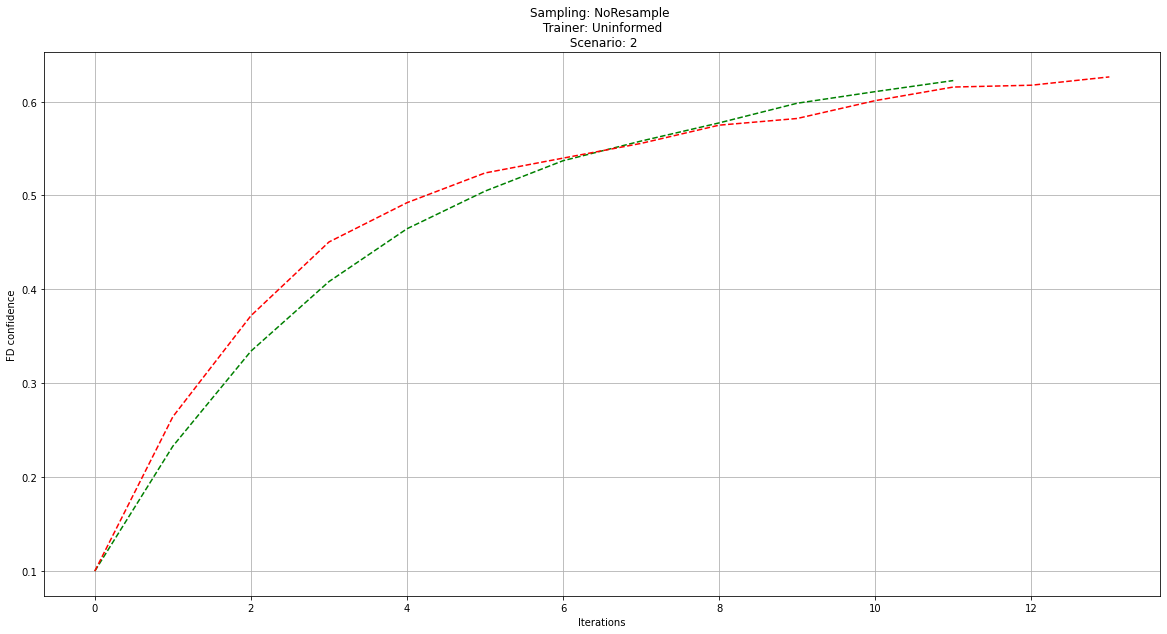

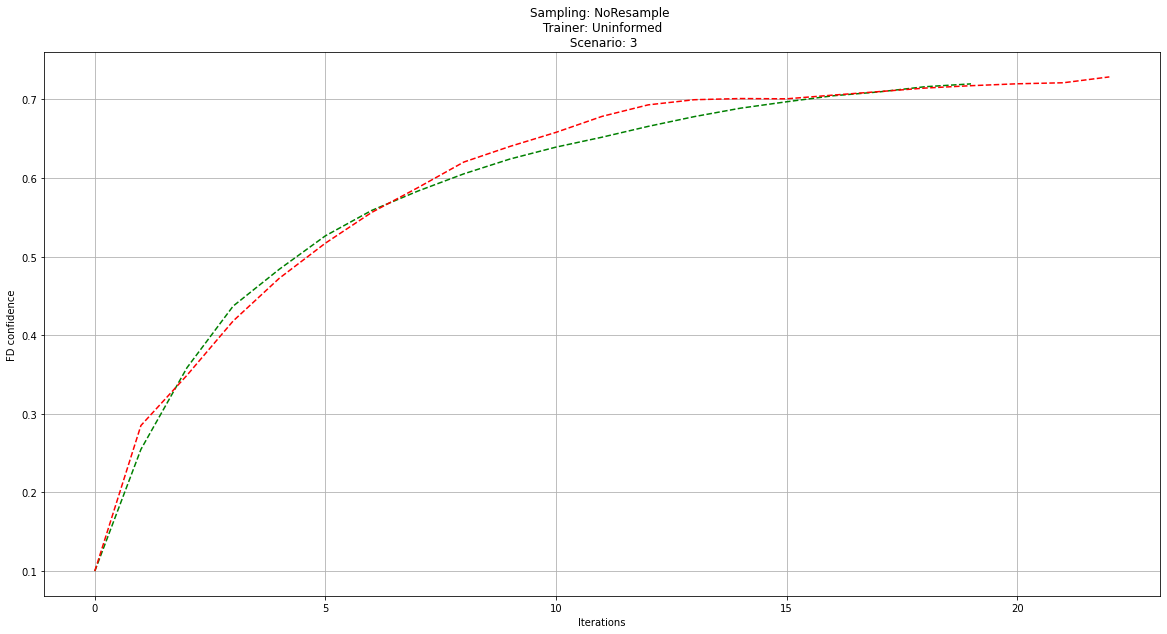

In [51]:
# for sampling_type in ["Resample", "NoResample"]:
for sampling_type in ["NoResample"]:
    for trainer_type in ["Full_Oracle", "Oracle", "Uninformed"]:
        for scenario in ["test_2", "1", "2", "3", "10"]:
            figure = plt.figure(figsize=(20,10))
            plt.title(f"Sampling: {sampling_type} \n Trainer: {trainer_type} \n Scenario: {scenario}")
            max_iter_num = 0

            '''Sample fds except for the target fd for plots'''
            fd_space = [hypothesis['cfd'] for hypothesis in scenarios_info[scenario]['hypothesis_space']]
            sampled_fd_space = sample(fd_space, min(len(fd_space),0))
            target_fd = scenarios_info[scenario]['target_fd']
            if target_fd not in sampled_fd_space:
                sampled_fd_space.append(target_fd)
            
            '''Indication whether the plot is filled or not'''
            plot_filled = False

            for learner_type in ["Random", "ActiveLR"]:
                simulation_folder_name = f"{trainer_type}_{learner_type}_{sampling_type}_Iterations_30_Scenario_{scenario}"
                if simulation_folder_name in base_folders:
                    # print(simulation_folder_name)
                    folders = os.listdir(os.path.join(base_folder_path, simulation_folder_name))
                    
                    # '''Select the subplot region'''
                    if learner_type == "Random":
                        target_color = 'g--'
                        normal_color = 'b--'
                        # plt.subplot(1,2,1)
                    else:
                        target_color = 'r--'
                        normal_color = 'b--'
                        # plt.subplot(1,2,2)
                    
                    tmp_plot_dict = dict()
                    for folder in folders:
                        with open(os.path.join(base_folder_path,simulation_folder_name, folder, "project_info.json"), 'r') as fp:
                            project_info = json.load(fp)
                            target_fd = project_info["scenario"]["target_fd"]
                        path = os.path.join(base_folder_path, simulation_folder_name, folder, "fd_metadata.p")

                        if os.path.exists(path):
                            with open(path, 'rb') as fp:
                                data = pk.load(fp)
                            
                            for fd, fd_metadata in data.items():

                                if fd not in tmp_plot_dict:
                                    tmp_plot_dict[fd] = dict()
                                
                                for d in fd_metadata.conf_history:
                                    iter_num, value = d.iter_num, d.value

                                    '''Update max iter num among Random and ActiveLR for same x-axis range in plots for comparison'''
                                    if iter_num > max_iter_num:
                                        max_iter_num = iter_num
                                    if iter_num not in tmp_plot_dict[fd]:
                                        tmp_plot_dict[fd][iter_num] = []
                                    tmp_plot_dict[fd][iter_num].append(value)


                    # plot_data= [(d.iter_num,d.value) ]
                    # 
                    # print(tmp_plot_dict)
                    '''Compute mean and variance'''
                    plot_value_dict = {}
                    for fd in sampled_fd_space:
                        if fd in tmp_plot_dict:
                            plot_value_dict[fd] = dict()
                            for iter, values in tmp_plot_dict[fd].items():
                                if len(values) == 1:
                                    values.append(values[0])
                                plot_value_dict[fd][iter] = {'mean': mean(values), 'std':stdev(values) }
                        
                            else:
                                iters = sorted(list(plot_value_dict[fd].keys()))
                                if fd == target_fd:
                                    plot_filled = True
                                    plt.plot(iters, [plot_value_dict[fd][iter]['mean'] for iter in iters], target_color)
                                else:
                                    plot_filled = True
                                    plt.plot(iters, [plot_value_dict[fd][iter]['mean'] for iter in iters], normal_color)
                    
            else:
                if plot_filled:
                    plt.xlabel("Iterations")
                    plt.ylabel('FD confidence')
                    # plt.title(f'Learner: {learner_type}')
                    plt.grid(True)
                    plt.show()
                else:
                    plt.close()





In [52]:
len(scenarios_info['3']['hypothesis_space'])

50